In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [2]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('pt_jet_g')
    scalar.append('phi_jet')
    scalar.append('pt_quark')
    scalar.append('eta_quark')
    scalar.append('phi_quark')
    scalar.append('pt_photon')
    scalar.append('phi_photon')
    scalar.append('pt_electron')
    scalar.append('eta_electron')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [3]:
dataFiles = ["$HOME/EIC/output/111.root"]
a = getData(dataFiles)


Processed $HOME/EIC/output/111.root in 54.1 seconds


In [4]:
d = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
d = applyCut(d, 'pt_jet > 4', 'pt_jet > 4')
d = applyCut(d, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
d = applyCut(d, '10 < pt_electron < 15', '10 < pt_electron < 15')

d = fixPhi(d, 'photon')
d.eval('pt_ratio = pt_jet/pt_electron', inplace = True)

pt_electron > 4 959634  fraction kept: 3.2
pt_jet > 4 190580  fraction kept: 19.9
0.1 < y < 0.85 121616  fraction kept: 63.8
10 < pt_electron < 15 5743  fraction kept: 4.7
Fixed photon phi range
Fixed photon delta phi range


In [5]:
d1 = applyCut(d, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

delta_phi_photon_abs < 0.4 5690  fraction kept: 99.1


In [6]:
d1.eval('nu = 0.533*Q2/x', inplace=True)

In [7]:
print np.mean(d1['x']), np.mean(d1['nu'])

0.35114434 357.18668


In [8]:
def plotRatio1dnvar(txt):
    fig = plt.figure(figsize = (10,8))
    plot1dnvar([d, d1], ['pt_ratio']*2,\
               ['$p_T^{jet} > 4 GeV$',\
                '$p_T^{jet} > 4 GeV$ \n $|\Delta \phi|< 0.4$'],\
               0, 2, 0, 7e6, 0.05, '$p_T^{jet}/p_T^{electron}$', 'linear', txt)

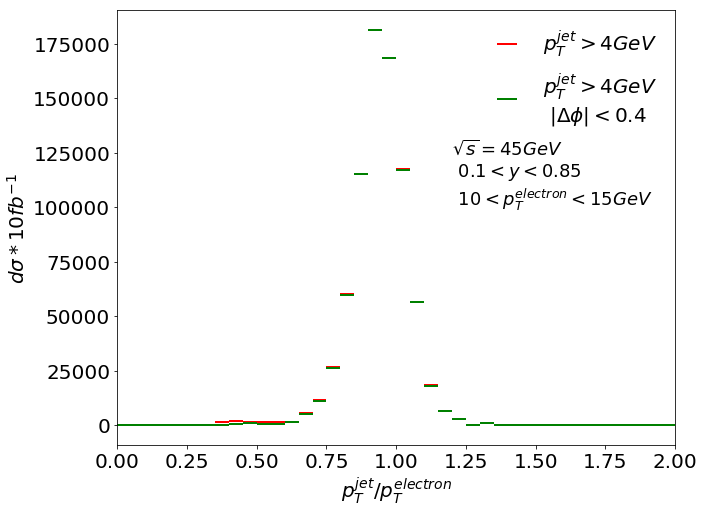

In [13]:
fig = plotRatio1dnvar('pt_ratio')
plt.text(1.2,100000,'$\sqrt{s}=45 GeV$ \n $0.1 < y < 0.85$ \n $10 < p_T^{electron} < 15 GeV$', fontsize = 18)
plt.savefig('images/pt_ratio_low_e.pdf', bbox_inches='tight')